In [1]:
ls

Ipython.ipynb  __pycache__/  main.py  prepare_data.py  utills.py
README.md      inputs/       models/  src/


In [2]:
import glob
import pandas as pd
import numpy as np
import string
import re
from sklearn.model_selection import train_test_split

In [55]:
import nltk

In [3]:
def read_all_csv(files_path):
    all_files = glob.glob(files_path + "*.csv")

    df_list = []
    for filename in all_files:
        df = pd.read_csv(filename, index_col=None, header=0,usecols=["commentID","commentBody","sectionName"])
        df_list.append(df)

    data_frame = pd.concat(df_list, axis=0, ignore_index=True)
    data_frame.drop_duplicates(subset='commentID', inplace=True)
    
    #only selecting Politics comments and returning commentBody only
    data_frame =  data_frame[data_frame["sectionName"]=="Politics"]["commentBody"]
    return data_frame

In [11]:
data_frame = read_all_csv("./inputs/")

In [12]:
data_frame.iloc[1]

'How does one explain to a country that has been fed nothing but bull for 38 years that it is 2018 and the talk of infrastructure spending is worse than just silly it is insanity.<br/>Hi-ways and bridges is 1950s talk. The need to move people is about hi-speed trains, planes but mostly bit and bytes. Memphis is the busiest airport in America. Two hundred fifty nine citizens generate 85% of the US economy. The need for infrastructure is about making American cities new economy ready. It is about cities where commutes are yesterday and intraurban transportation means public transportation, moving sidewalks and bicycle paths. Modern infrastructure is about denser housing and energy efficiency.<br/>In 1980 America decided to turn back the clock and 2018 means America must decide whether to compete in a future where the urban economies are 85% plus of the economy or serve the needs of less than 15% of economy.<br/>I fear America\'s political divide will serve the past and not the future. A 

In [14]:
data_frame = pd.DataFrame(data_frame)

In [15]:
data_frame.reset_index(drop=True,inplace=True)

In [16]:
data_frame.head()

,commentBody
0,Trump is promoting an entire epistemology of w...
1,How does one explain to a country that has bee...
2,The rise of more efficient and non-gas cars me...
3,It's not the President's job to create or pass...
4,"Beware of the ""private investment"" source of f..."


In [106]:
def clean_text(txt,pun):
    start = txt.find( '<a href' )
    if start != -1:
        txt = txt[:start]
    txt = txt.replace('US','america')
    txt = txt.replace('<br/>','').lower()
    txt = txt.replace('u.s','america')
    txt = txt.replace('mr.','mr')
    txt = txt.replace('mrs.','mr')
    txt = txt.replace('...','.')
   
    txt = "".join(v for v in txt if v not in pun)
    txt = txt.translate(str.maketrans({key: " {0} ".format(key) for key in ',!.?'})).strip()
    
    return txt

In [107]:
data_frame.commentBody[1]

'it will take all of that money just to finish our california bullet train  how complicated is that'

In [89]:
clean_text(data_frame.commentBody[1])

'how does one explain to a country that has been fed nothing but bull for 38 years that it is 2018 and the talk of infrastructure spending is worse than just silly it is insanityhiways and bridges is 1950s talk the need to move people is about hispeed trains planes but mostly bit and bytes memphis is the busiest airport in america two hundred fifty nine citizens generate 85 of the america economy the need for infrastructure is about making american cities new economy ready it is about cities where commutes are yesterday and intraurban transportation means public transportation moving sidewalks and bicycle paths modern infrastructure is about denser housing and energy efficiencyin 1980 america decided to turn back the clock and 2018 means america must decide whether to compete in a future where the urban economies are 85 plus of the economy or serve the needs of less than 15 of economyi fear americas political divide will serve the past and not the future a prosperous future means nouri

In [108]:
pun = set('\"#$%&\'()*+=-/:;<=>@[\]^_`{|}~')

In [112]:
data_frame['commentBody'] = data_frame['commentBody'].apply(clean_text) # apply it to all tweets

TypeError: clean_text() takes 2 positional arguments but 29 were given

In [91]:
data_frame['length'] = data_frame['commentBody'].str.len() #check Leanth of Each tweet
data_frame.head()

,commentBody,length
0,trump is promoting an entire epistemology of w...,556
1,how does one explain to a country that has bee...,1315
2,the rise of more efficient and nongas cars mea...,291
3,its not the presidents job to create or pass l...,158
4,beware of the private investment source of fun...,532


In [92]:
data_frame.length.describe()

count    479701.000000
mean        328.751772
std         303.328615
min           0.000000
25%         114.000000
50%         231.000000
75%         440.000000
max        1810.000000
Name: length, dtype: float64

In [95]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/anaconda/envs/py37_tensorflow/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


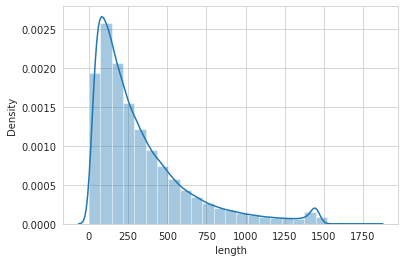

In [96]:
sns.set_style('whitegrid')
sns.distplot(data_frame['length'],bins=25)

In [ ]:
#due to limitation of computetion power we will remove extra large comments

In [97]:
data_frame = data_frame[(data_frame['length']>=5)&(data_frame['length']<=250)]

In [98]:
data_frame.length.describe()

count    254245.000000
mean        124.742732
std          64.889573
min           5.000000
25%          70.000000
50%         120.000000
75%         178.000000
max         250.000000
Name: length, dtype: float64

In [99]:
data_frame.reset_index(drop=True,inplace=True)

In [100]:
data_frame.shape

(254245, 2)

In [101]:
comments = data_frame['commentBody'].values.tolist()

In [102]:
comments[:10]

['its not the presidents job to create or pass legislation  president trump is rightly forcing congress to work together to do the job they were elected to do  ',
 'it will take all of that money just to finish our california bullet train  how complicated is that',
 'so 15 trillion in tax cuts for mostly people who didnt need it and now we need to cut what to get 13 trillion for infrastructurewhat is wrong with this picture as the rs will go after social security medicare medicaid etc',
 'cnbc is reporting gop interest in raising the gas tax to pay for infrastructure  i hope the middle and lower classes dont get tired of all this winning',
 'light on details yes but mostly light on funding',
 'im no economist so please explain to me how 15 trillion in tax cuts translates into 15 trillion in infrastructure spending',
 'up until sotu the infrastructure spending was targeted to be 1 trillion  trump adds 500 billion as if it is nothing  never mind the deficit  ',
 'problem number 1 how to 

In [115]:
from sklearn.model_selection import train_test_split


In [ ]:
train_data, test_data = train_test_split(data,test_size=40, random_state=42)

In [114]:
!python prepare_data.py

                                           commentBody
938  Trump is promoting an entire epistemology of w...
939  How does one explain to a country that has bee...
940  The rise of more efficient and non-gas cars me...
941  It's not the President's job to create or pass...
942  Beware of the "private investment" source of f...
                                           commentBody  length
938  trump is promoting an entire epistemology of w...     578
939  how does one explain to a country that has bee...    1356
940  the rise of more efficient and nongas cars mea...     297
941  its not the presidents job to create or pass l...     161
942  beware of the private investment source of fun...     552


In [ ]:
!python main.py

2020-09-15 11:04:02.265582: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 11:04:21.717943: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-15 11:04:21.754426: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0001:00:00.0 name: Tesla K80 computeCapability: 3.7
coreClock: 0.8235GHz coreCount: 13 deviceMemorySize: 11.17GiB deviceMemoryBandwidth: 223.96GiB/s
2020-09-15 11:04:21.754484: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-15 11:04:22.048097: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcublas.so.10
2020-09-15 11:04:22.197319: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcufft.so.10
202